In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Попробуем написать функцию для подсчёта производной функции любого порядка

$$
    f'(x) = \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h}
$$
Опустим знак предела и посмотрим на выражение

$$
    f''(x) = \frac{f'(x + h) - f'(x)}{h} = \frac{\frac{f(x + 2h) - f(x + h)}{h} - \frac{f(x + h) - f(x)}{h}}{h} = \frac{f(x + 2h) - f(x + h) - f(x + h) + f(x)}{h^2} = \frac{f(x + 2h) - 2f(x + h) + f(x)}{h^2}
$$
$$
    f^{(3)}(x) = \frac{f(x + 3h) - 2f(x + 2h) + f(x + h) - f(x + 2h) + 2f(x + h) - f(x)}{h^3} = \frac{f(x + 3h) - 3f(x + 2h) + 3(x + h) - f(x)}{h^3}
$$

Можно заметить закономерность. Попробуем показать её теоретически

$$
    f^{(k + 1)}(x) = \frac{\sum_{i = 0}^{k} a_{ik} f(x + h + ih) - \sum_{i = 0}^{k} a_{ik} f(x + ih)}{h} = \sum_{i = 0}^{k + 1} a_{i, k+1}f(x + ih) 
$$
$$
    \frac{1}{h}\left(\sum_{i = 1}^{k + 1} a_{i - 1, k}f(x + ih) - \sum_{i = 0}^{k} a_{ik}f(x + ih)\right) = \sum_{i = 0}^{k + 1} a_{i, k+1}f(x + ih) 
$$

$$
    a_{0, k + 1} = -\frac{a_{0, k}}{h}
$$
$$
    a_{k + 1, k + 1} = \frac{a_{k, k}}{h}
$$
$$
    a_{i, k + 1} = \frac{a_{i - 1, k} - a_{i, k}}{h}, \quad 1 \leqslant i \leqslant k
$$

При этом появляется условие на первую производную вида:
$$
    a_{0, 1} = -\frac{1}{h}
$$
$$
    a_{1, 1} = \frac{1}{h}
$$

Покажем, что
$$
    a_{0, k} = \frac{(-1)^{k}}{h^k}
$$
$$
    a_{k, k} = \frac{1}{h^k}
$$
$$
    a_{i, k} = \frac{(-1)^{k - i}}{h^k}C_{k}^{i}
$$
И на самом деле, хватает просто последнего равенства

Первые два равенства очевидны. Последнее равенство доказывается по индукции
$$
    a_{i, k + 1} = \frac{(-1)^{k + 1 - i}C_{k}^{i - 1} - (-1)^{k - i}C_{k}^{i}}{h^{k + 1}}
$$
$$
    a_{i, k + 1} = \frac{(-1)^{k - i}}{h^{k + 1}}\left(-C_{k}^{i} - C_{k}^{i - 1}\right) = \frac{(-1)^{k - i + 1}}{h^{k + 1}}C_{k + 1}^{i}
$$

Итак, мы получили, что для всех $i$:
$$
    a_{i, k} = \frac{(-1)^{k - i}}{h^k}C_{k}^i
$$

$$
    C_{k}^i = \frac{k!}{(k - i)!i!} = \frac{(k - i + 1)(k - i + 2)\dots k}{i!}
$$

In [2]:
def derivative(f, k, x, step=0.001):
    binomials = [1]
    for i in range(1, k + 1):
        binomials.append( (binomials[-1] * (k - i + 1)) // i )
    result = 0
    sign = (-1) ** k
    denom = step ** k
    point = x
    for i in range(k + 1):
        result += sign * binomials[i] * f(point)
        point += step
        sign *= -1
    return result / denom

Посмотрим зависимость от шага ошибки производной для функции
$$
    f(x) = \frac{x^5}{5!}
$$

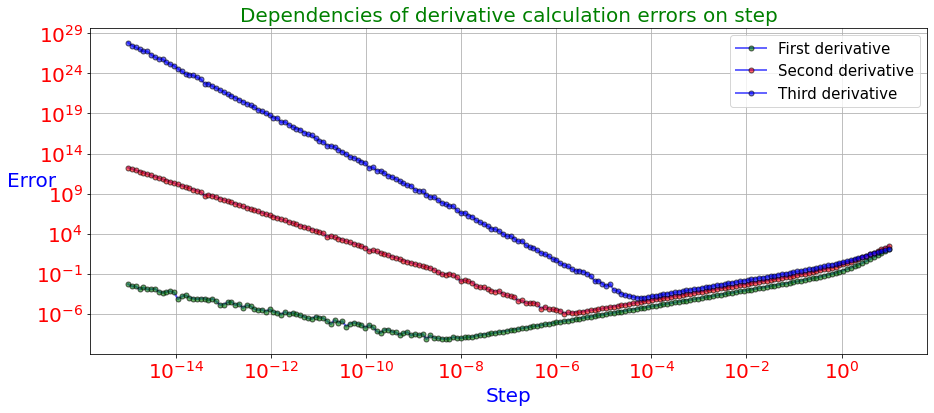

In [3]:
x_arr = np.linspace(0, 1, 101)
steps = []
abs_max_errs_1 = []
abs_max_errs_2 = []
abs_max_errs_3 = []
f = lambda x: x ** 5 / 120
for step in np.logspace(-15, 1, 200):
    der_calculated = np.array([derivative(f, 1, x, step=step) for x in x_arr])
    der_real = x_arr ** 4 / 24
    abs_max_errs_1.append(max(abs(der_calculated - der_real)))
    der_calculated = np.array([derivative(f, 2, x, step=step) for x in x_arr])
    der_real = x_arr ** 3 / 6
    abs_max_errs_2.append(max(abs(der_calculated - der_real)))
    der_calculated = np.array([derivative(f, 3, x, step=step) for x in x_arr])
    der_real = x_arr ** 2 / 2
    abs_max_errs_3.append(max(abs(der_calculated - der_real)))
    steps.append(step)
plt.figure(figsize=(15, 6))
plt.plot(steps,
         abs_max_errs_1,
         color="blue", 
         marker='.',
         linestyle="-",
         label="First derivative",
         markerfacecolor="green", 
         markeredgecolor="black",
         markersize=10,
         linewidth=2,
         alpha=0.6)
plt.plot(steps,
         abs_max_errs_2,
         color="blue", 
         marker='.',
         linestyle="-",
         label="Second derivative",
         markerfacecolor="red", 
         markeredgecolor="black",
         markersize=10,
         linewidth=2,
         alpha=0.6)
plt.plot(steps,
         abs_max_errs_3,
         color="blue", 
         marker='.',
         linestyle="-",
         label="Third derivative",
         markerfacecolor="blue", 
         markeredgecolor="black",
         markersize=10,
         linewidth=2,
         alpha=0.6)
plt.legend(fontsize=15)
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.title("Dependencies of derivative calculation errors on step", fontsize=20, color="green")
plt.xlabel("Step", fontsize=20, color="blue")
plt.ylabel("Error", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

Из этих графиков можно заметить, что ошибка каждого последующего подсчёта производной больше предыдущей

Кроме этого становится заметным эффект наращивания ошибки. Когда шаг становится слишком маленьким, появляется очень большое влияние от ошибки вычисления маленьких изменений функции. Поскольку они ограничены, то при шагах меньше какого-то значения изменение функции становится порядка машинной точности, и получается, что точность числителя не меняется, а знаменатель на несколько порядков становится меньше, из-за чего производная становится ещё более неверной

Таким образом, появляется два эффекта: увеличение ошибки от увеличения размера шага из-за всё менее точного математического определения производной, и увеличение ошибки от уменьшения шага из-за ограничения в машинной точности. Это означает, что существует какой-то оптимальный шаг, с которым подсчёт производной становится наиболее точным

Посчитаем теперь зависимость той максимальной точности, которой удаётся достичь, от порядка производной для степенной функции

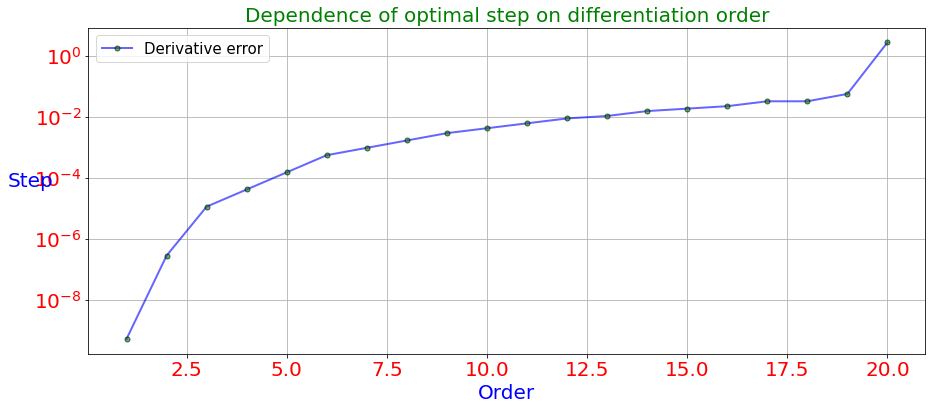

In [4]:
x_arr = np.linspace(0, 1, 101)
f = lambda x: x ** 20 / np.prod(list(range(1, 21)))
optimal_steps = []
der_powers = []
for der_power in range(1, 21):
    steps = []
    abs_max_errs = []
    for step in np.logspace(-15, 1, 200):
        der_calculated = np.array([derivative(f, der_power, x, step=step) for x in x_arr])
        der_real = x_arr ** (20 - der_power) / np.prod(list(range(1, 21 - der_power)))
        abs_max_errs.append(max(abs(der_calculated - der_real)))
        steps.append(step)
    der_powers.append(der_power)
    optimal_steps.append(steps[np.argmin(abs_max_errs)])
der_powers = np.array(der_powers)
optimal_steps = np.array(optimal_steps)
plt.figure(figsize=(15, 6))
plt.plot(der_powers,
         optimal_steps,
         color="blue", 
         marker='.',
         linestyle="-",
         label="Derivative error",
         markerfacecolor="green", 
         markeredgecolor="black",
         markersize=10,
         linewidth=2,
         alpha=0.6)
plt.legend(fontsize=15)
plt.grid(True)
plt.yscale("log")
plt.title("Dependence of optimal step on differentiation order", fontsize=20, color="green")
plt.xlabel("Order", fontsize=20, color="blue")
plt.ylabel("Step", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.show()

Возьмём какую-нибудь функцию, область значений которой ограничена, чтобы посмотреть, как работает программа. Начнём с простейших

Теперь можно провести эксперимент по проведению производной функции на графике этой функции

Касательная к графику в точке имеет угловой коэффициент равный производной функции в этой точке. То есть:
$$
    y = f'(x_0)x + b
$$
При этом $y(x_0) = f(x_0) = f'(x_0)x_0 + b$. Таким образом,
$$
    b = f(x_0) - f'(x_0)x_0
$$
Итого, касательная к графику имеет уравнение:
$$
    y = f'(x_0)(x - x_0) + f(x_0)
$$

Step = 5.111433483440166e-10


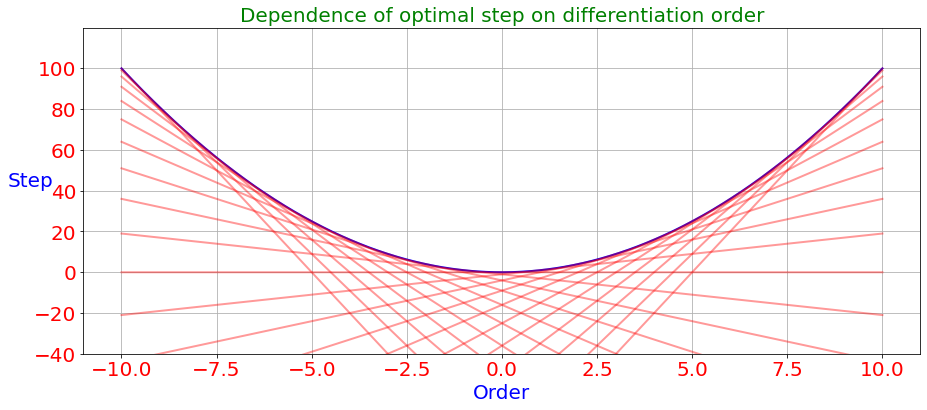

In [48]:
f = lambda x: x ** 2

x_arr = np.linspace(-10, 10, 2001)
f_values = [f(x) for x in x_arr]
step = optimal_steps[0]
print(f"Step = {step}")


plt.figure(figsize=(15, 6))
plt.plot(x_arr,
         f_values,
         color="blue",
         linestyle="-",
         linewidth=2)
for x_0 in range(-10, 11, 1):
    der = derivative(f, 1, x_0, step=step)
    tangent_values = [der * (x - x_0) + f(x_0) for x in x_arr]
    plt.plot(x_arr,
             tangent_values,
             color="red", 
             linestyle="-",
             linewidth=2,
             alpha=0.4)
plt.grid(True)
plt.title("Dependence of optimal step on differentiation order", fontsize=20, color="green")
plt.xlabel("Order", fontsize=20, color="blue")
plt.ylabel("Step", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.ylim([-40, None])
plt.show()

Теперь попробуем посмотреть на разложение в ряд Тейлора. Само по себе разложение имеет следующий вид:
$$
    f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)^2}{2!}(x - x_0)^2 + \dots
$$
Проверим, как это работает на практике

Decomposition is nice in interval (-0.3100000000000005; 0.3100000000000005)


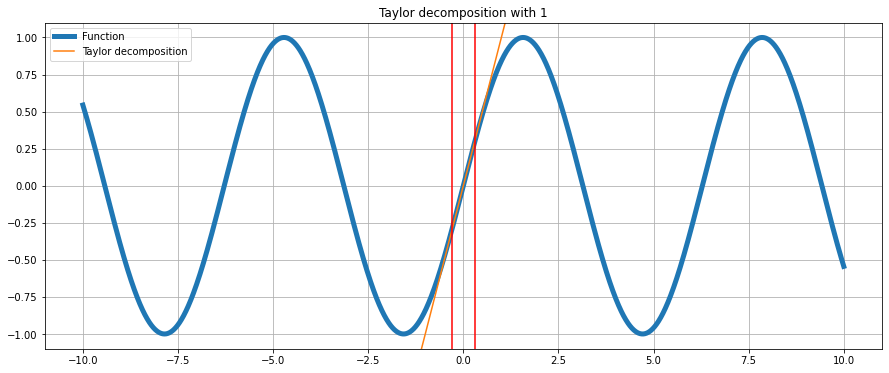

Decomposition is nice in interval (-0.9000000000000004; 0.9000000000000004)


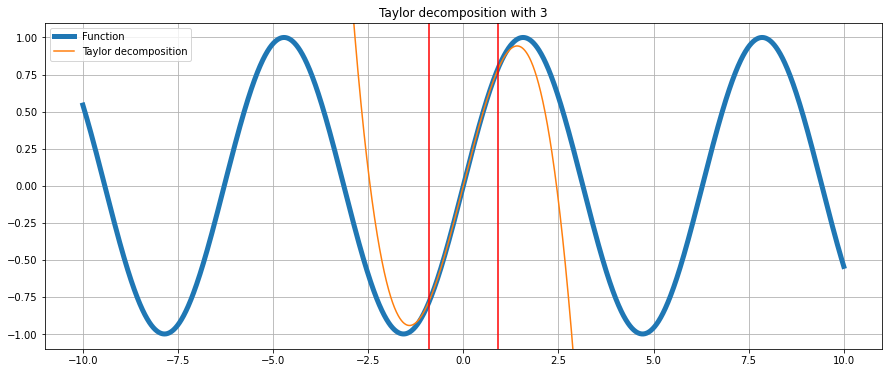

Decomposition is nice in interval (-1.5899999999999999; 1.5899999999999999)


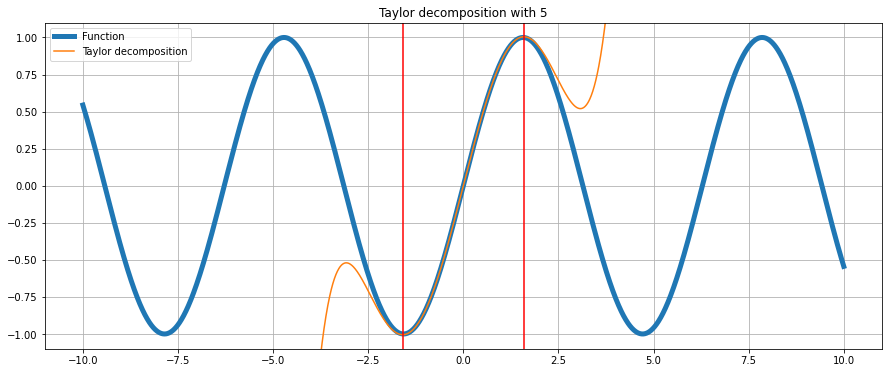

Decomposition is nice in interval (-2.3099999999999996; 2.3099999999999996)


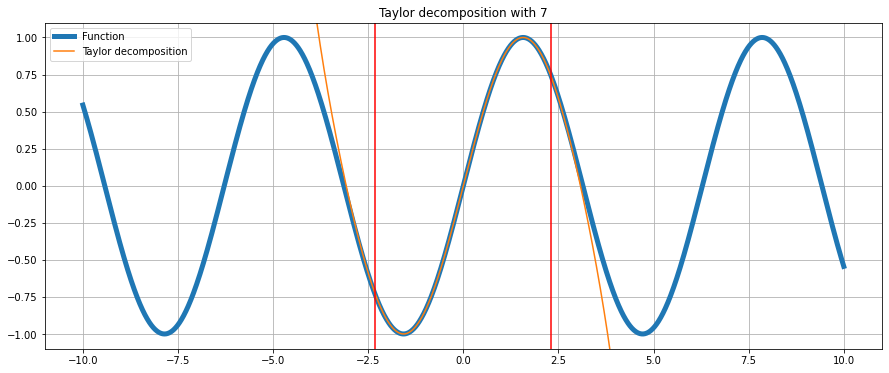

Decomposition is nice in interval (-3.04; 3.04)


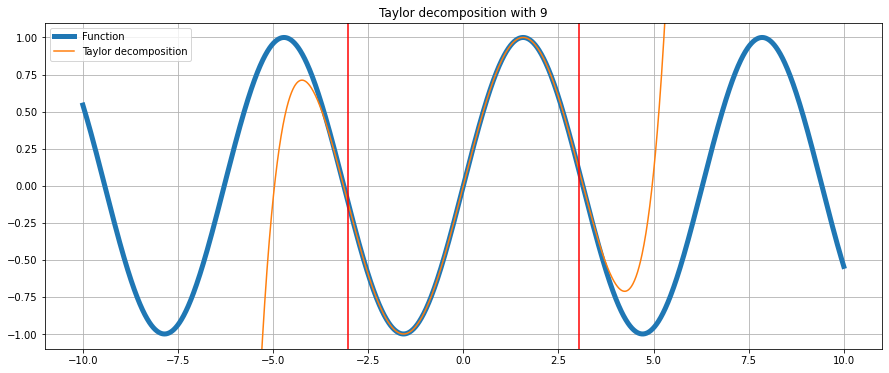

Decomposition is nice in interval (-3.79; 3.79)


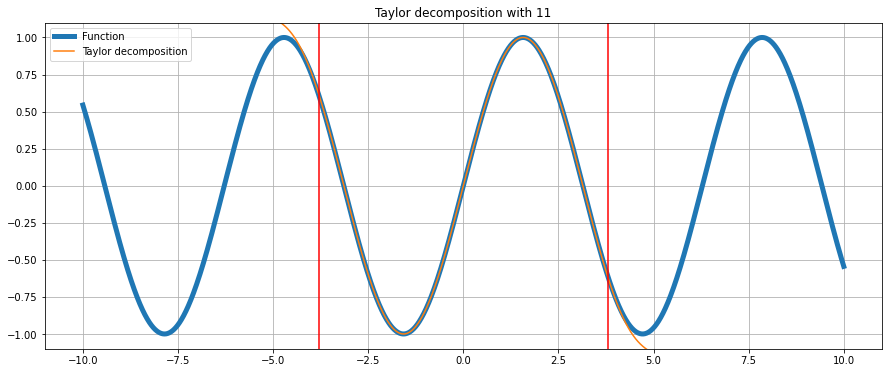

Decomposition is nice in interval (-4.53; 4.53)


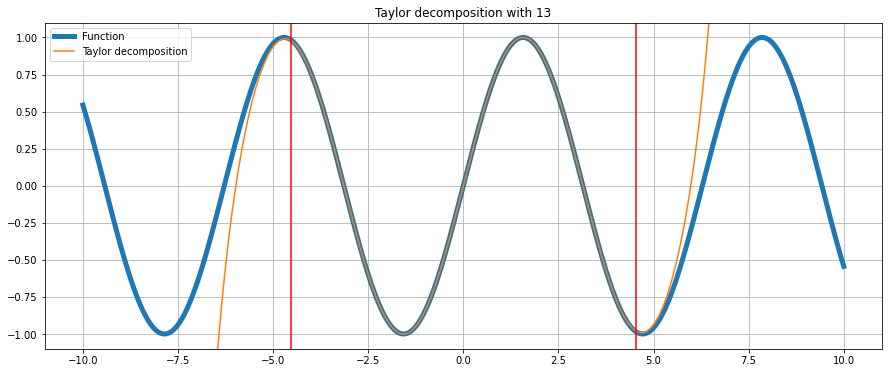

Decomposition is nice in interval (-5.27; 5.27)


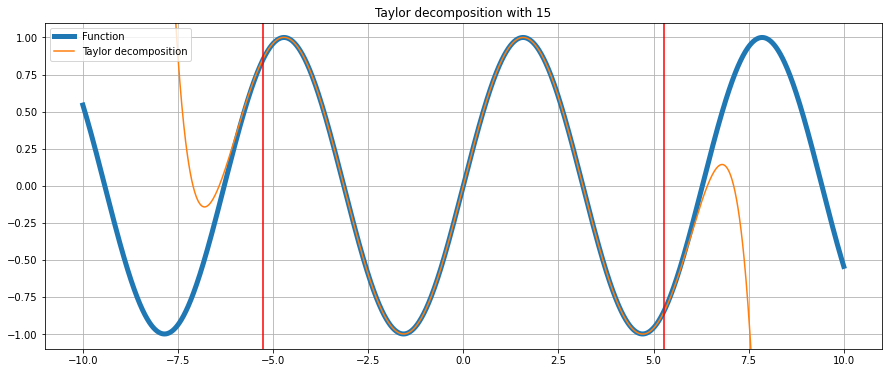

Decomposition is nice in interval (-6.02; 6.02)


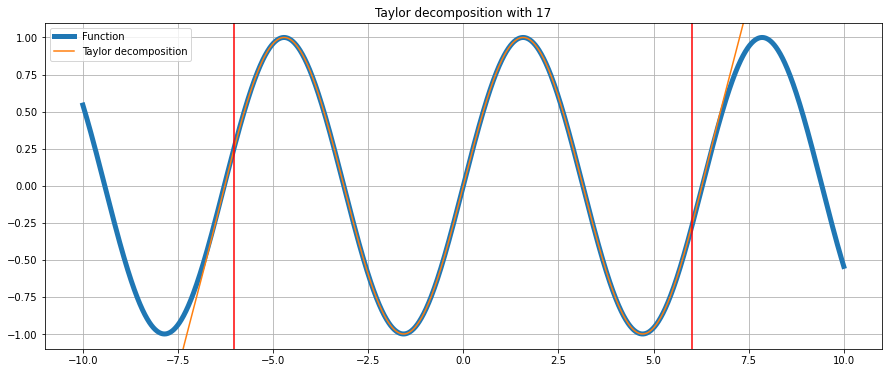

Decomposition is nice in interval (-6.77; 6.77)


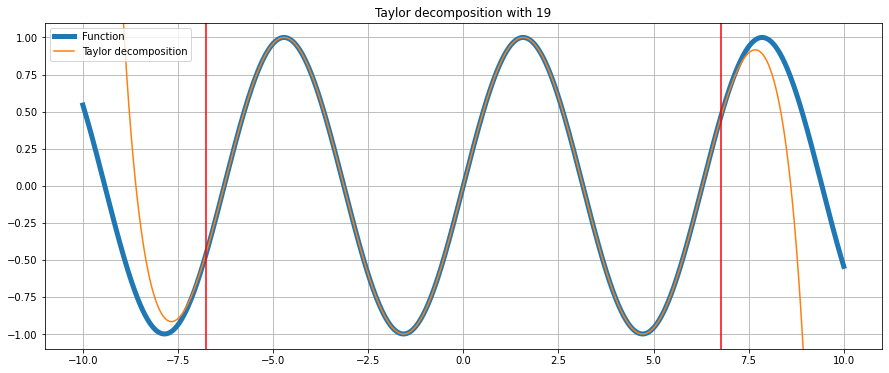

Decomposition is nice in interval (-5.96; 5.96)


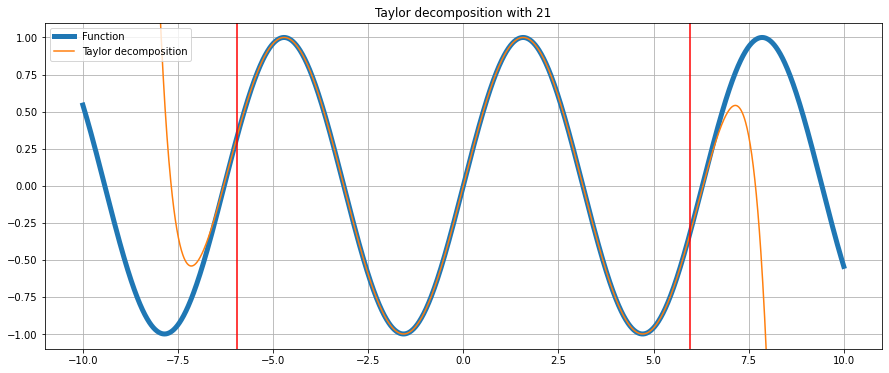

Decomposition is nice in interval (-5.25; 5.25)


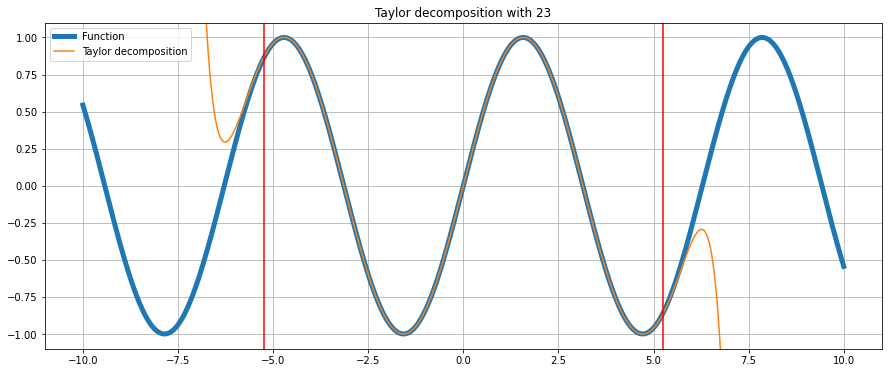

Decomposition is nice in interval (-4.59; 4.59)


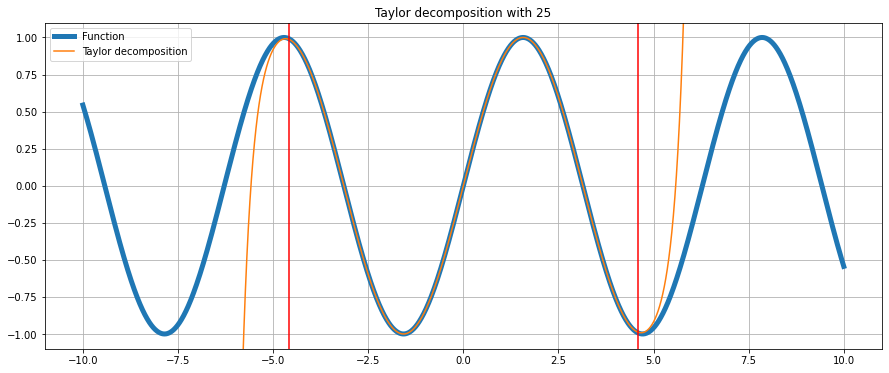

Decomposition is nice in interval (-4.05; 4.05)


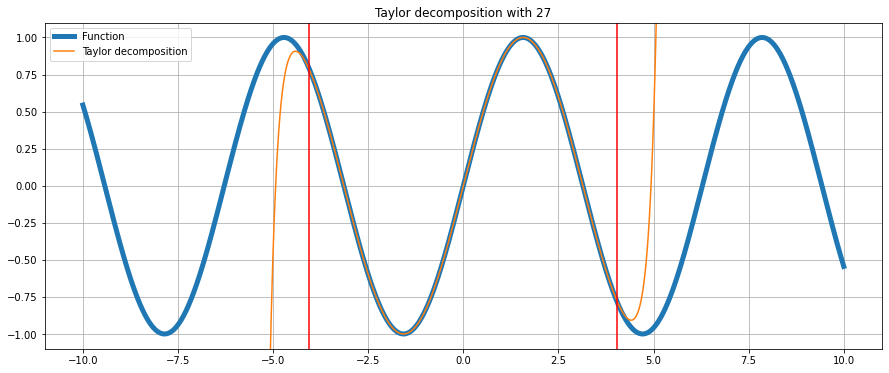

Decomposition is nice in interval (-3.7299999999999995; 3.7299999999999995)


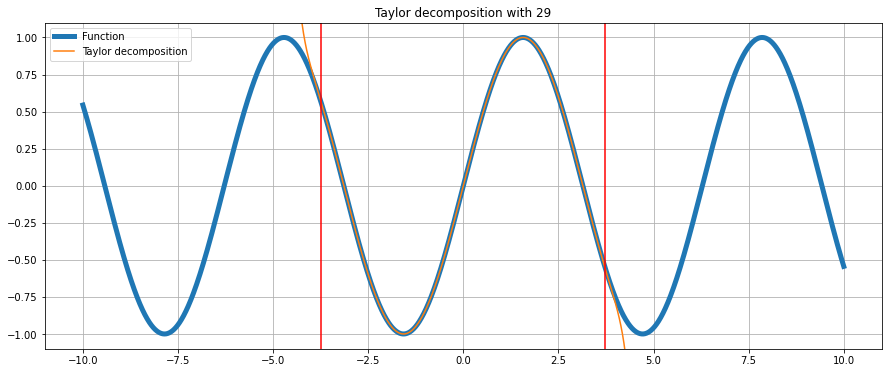

In [70]:
ders = [lambda x: np.sin(x), 
        lambda x: np.cos(x),
        lambda x: -np.sin(x),
        lambda x: -np.cos(x)]
f = ders[0]
x_0 = 0
EPS = 0.005
bounds = []

x_arr = np.linspace(-10, 10, 2001)
for max_der_deg in range(1, 31, 2):
    res = np.zeros_like(x_arr) + f(x_0)
    func_res = f(x_arr)
    for der in range(1, max_der_deg + 1):
        for i, x in enumerate(x_arr):
            res[i] += ders[der % 4](x_0) * (x - x_0) ** der / np.prod(list(range(1, der + 1)))
    plt.figure(figsize=(15, 6))
    plt.title(f"Taylor decomposition with {max_der_deg}")
    plt.plot(x_arr, func_res, label="Function", linewidth=5)
    plt.plot(x_arr, res, label="Taylor decomposition")
    lower_bound = x_arr[np.argwhere(abs(res - func_res) < EPS).ravel()[0]]
    bounds.append(abs(lower_bound))
    print(f"Decomposition is nice in interval ({lower_bound}; {-lower_bound})")
    plt.axvline(x=lower_bound, ymin=-2, ymax=2, color="red")
    plt.axvline(x=-lower_bound, ymin=-2, ymax=2, color="red")
    plt.legend()
    plt.grid(True)
    plt.ylim([-1.1, 1.1])
    plt.show()

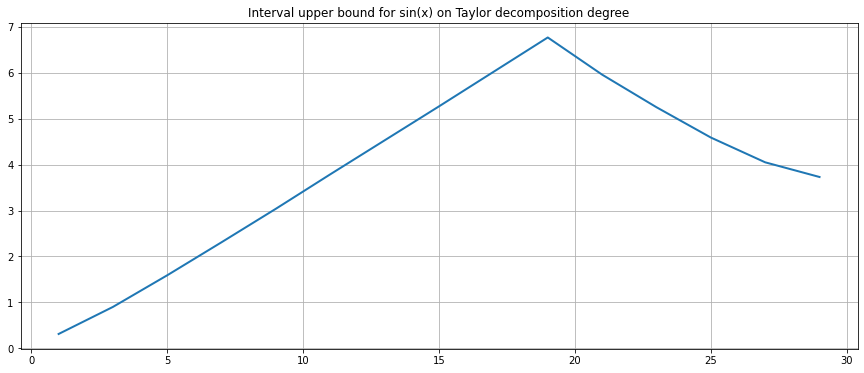

In [71]:
plt.figure(figsize=(15, 6))
plt.title(f"Interval upper bound for sin(x) on Taylor decomposition degree")
plt.plot(range(1, 31, 2), bounds, linewidth=2)
plt.grid(True)
plt.show()

Ограничение сверху на размер интервала сходимости связан с ошибками вычислительными, поскольку маленькие числа приходится возводить уже в больше степени и операции становятся менее точными